##Anomaly Detection Project

In [ ]:
!pip install kagglehub pandas numpy scikit-learn matplotlib seaborn

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest
from sklearn.svm import OneClassSVM
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import kagglehub
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator


##Download Dataset Using kagglehub

In [ ]:

# Download latest version
path = kagglehub.dataset_download("paultimothymooney/chest-xray-pneumonia")

print("Path to dataset files:", path) #simply take it from kagglehub

Using Colab cache for faster access to the 'chest-xray-pneumonia' dataset.
Path to dataset files: /kaggle/input/chest-xray-pneumonia


In [ ]:
import os
print(os.listdir("/kaggle/input/chest-xray-pneumonia"))


['chest_xray']


In [ ]:
print(os.listdir("/kaggle/input/chest-xray-pneumonia/chest_xray"))


['chest_xray', '__MACOSX', 'val', 'test', 'train']


In [ ]:
path = "/kaggle/input/chest-xray-pneumonia"

train_dir = path + "/chest_xray/train"
val_dir   = path + "/chest_xray/val"
test_dir  = path + "/chest_xray/test"


In [ ]:
print(os.listdir(train_dir))

['PNEUMONIA', 'NORMAL']


##Data Generators (with Augmentation)

because the data is imbalanced


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

IMG_SIZE = (150, 150)
BATCH_SIZE = 32

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True
)

val_test_datagen = ImageDataGenerator(rescale=1./255)

train_gen = train_datagen.flow_from_directory(
    train_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode="binary"
)

val_gen = val_test_datagen.flow_from_directory(
    val_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode="binary",
    shuffle=False
)

test_gen = val_test_datagen.flow_from_directory(
    test_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode="binary",
    shuffle=False
)


Found 5216 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


In [ ]:
IMG_SIZE = (224, 224)
BATCH_SIZE = 32

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=15,
    zoom_range=0.10,
    width_shift_range=0.10,
    height_shift_range=0.10,
    shear_range=0.10,
    horizontal_flip=True
)

val_test_datagen = ImageDataGenerator(rescale=1./255)

train_gen = train_datagen.flow_from_directory(
    train_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode="binary"
)

val_gen = val_test_datagen.flow_from_directory(
    val_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode="binary"
)

test_gen = val_test_datagen.flow_from_directory(
    test_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode="binary",
    shuffle=False
)


Found 5216 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


## model

In [38]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
    rotation_range=15,
    zoom_range=0.1,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    horizontal_flip=True
)

train_gen = train_datagen.flow_from_directory(
    train_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode="binary",
    subset='training'
)

val_gen = train_datagen.flow_from_directory(
    train_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode="binary",
    subset='validation'
)


Found 4173 images belonging to 2 classes.
Found 1043 images belonging to 2 classes.


In [41]:

from tensorflow.keras import layers, models

model = models.Sequential([
    layers.Input(shape=(224,224,3)),  # match your generator
    layers.Conv2D(32, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),
    layers.Conv2D(128, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)


##Training model

In [42]:
history = model.fit(
    train_gen,
    validation_data=val_gen,
    epochs=10
)


Epoch 1/10
131/131 ━━━━━━━━━━━━━━━━━━━━ 348s 3s/step - accuracy: 0.7641 - loss: 0.6400 - val_accuracy: 0.8476 - val_loss: 0.3294
Epoch 2/10
131/131 ━━━━━━━━━━━━━━━━━━━━ 341s 3s/step - accuracy: 0.9034 - loss: 0.2392 - val_accuracy: 0.9080 - val_loss: 0.2143
Epoch 3/10
131/131 ━━━━━━━━━━━━━━━━━━━━ 326s 2s/step - accuracy: 0.9052 - loss: 0.2140 - val_accuracy: 0.8677 - val_loss: 0.2605
Epoch 4/10
131/131 ━━━━━━━━━━━━━━━━━━━━ 341s 3s/step - accuracy: 0.9087 - loss: 0.2264 - val_accuracy: 0.9128 - val_loss: 0.2107
Epoch 5/10
131/131 ━━━━━━━━━━━━━━━━━━━━ 330s 3s/step - accuracy: 0.9241 - loss: 0.1929 - val_accuracy: 0.8754 - val_loss: 0.2476
Epoch 6/10
131/131 ━━━━━━━━━━━━━━━━━━━━ 341s 3s/step - accuracy: 0.9255 - loss: 0.1834 - val_accuracy: 0.9233 - val_loss: 0.1887
Epoch 7/10
131/131 ━━━━━━━━━━━━━━━━━━━━ 333s 3s/step - accuracy: 0.9411 - loss: 0.1574 - val_accuracy: 0.9291 - val_loss: 0.1630
Epoch 8/10
131/131 ━━━━━━━━━━━━━━━━━━━━ 342s 3s/step - accuracy: 0.9405 - loss: 0.1560 - val_accu

##test generator


In [44]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),  # match model input
    batch_size=32,
    class_mode='binary',
    shuffle=False  # important for consistent predictions
)


Found 624 images belonging to 2 classes.


##Test the model

In [45]:
test_loss, test_acc = model.evaluate(test_generator)
print("Test Accuracy:", test_acc)
print("Test Loss:", test_loss)


20/20 ━━━━━━━━━━━━━━━━━━━━ 15s 695ms/step - accuracy: 0.5876 - loss: 1.1553
Test Accuracy: 0.7868589758872986
Test Loss: 0.6190215349197388


##Predictions + detailed metrics

In [46]:
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report

# Predict probabilities
pred_probs = model.predict(test_generator)
pred_labels = (pred_probs > 0.5).astype(int)  # convert to 0/1

# True labels
true_labels = test_generator.classes

# Confusion matrix
cm = confusion_matrix(true_labels, pred_labels)
print("Confusion Matrix:\n", cm)

# Classification report: precision, recall, F1-score
report = classification_report(true_labels, pred_labels, target_names=test_generator.class_indices.keys())
print("Classification Report:\n", report)


20/20 ━━━━━━━━━━━━━━━━━━━━ 18s 862ms/step
Confusion Matrix:
 [[105 129]
 [  4 386]]
Classification Report:
               precision    recall  f1-score   support

      NORMAL       0.96      0.45      0.61       234
   PNEUMONIA       0.75      0.99      0.85       390

    accuracy                           0.79       624
   macro avg       0.86      0.72      0.73       624
weighted avg       0.83      0.79      0.76       624



##Plot training curves

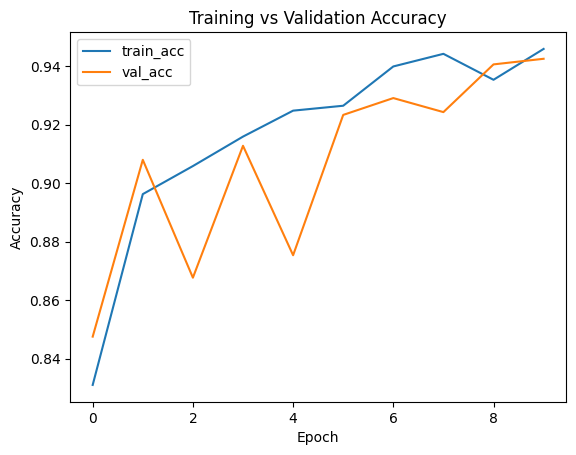

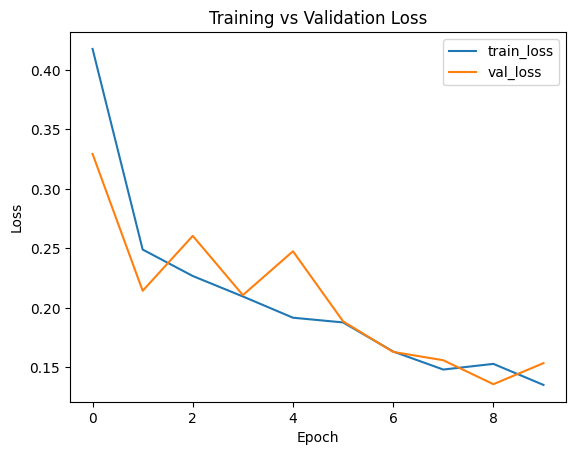

In [47]:
import matplotlib.pyplot as plt

# Accuracy curve
plt.plot(history.history['accuracy'], label='train_acc')
plt.plot(history.history['val_accuracy'], label='val_acc')
plt.title('Training vs Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Loss curve
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.title('Training vs Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


##Saving the model

In [50]:
# Save in native Keras format
model.save("chest_xray_model.keras")


this is the way to download my model

In [51]:
from google.colab import files

files.download("chest_xray_model.keras")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>